In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import keras
from keras.layers import Embedding
from random import randrange

In [4]:
df2 = pd.read_csv("ks-projects-201801.csv", sep=",", header=None, engine='python') 

In [5]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
# pd.set_option('display.max_rows', 7500)
# pd.set_option('display.max_columns', 106)
#df2.head(5)

In [6]:
df2.isnull().sum()

0
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
df2 = df2.dropna(axis=0)
#df3.head(5)

In [8]:
# Cleaning Check
df2.isnull().sum()

0
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [9]:
df4=df2

In [10]:
le = preprocessing.LabelEncoder()
df4['backers'] = le.fit_transform(df4.backers.values)
df4['goal'] = le.fit_transform(df4.goal.values)
df4['pledged'] = le.fit_transform(df4.pledged.values)
df4['usd_pledged'] = le.fit_transform(df4.usd_pledged.values)
df4['usd_pledged_real'] = le.fit_transform(df4.usd_pledged_real.values)
df4['usd_goal_real'] = le.fit_transform(df4.usd_goal_real.values)
df4['state'] = le.fit_transform(df4.state.values) 
df4['country'] = le.fit_transform(df4.country.values) 
df4['category'] = le.fit_transform(df4.category.values) 
df4['main_category'] = le.fit_transform(df4.main_category.values) 
df4['currency'] = le.fit_transform(df4.currency.values)
df4['ID'] = le.fit_transform(df4.ID.values)

In [ ]:
# Neural Network

In [33]:
df8 = df4.drop(columns = ['name', 'deadline', 'launched'], axis = 1)
df8.head(5)

,ID,category,main_category,currency,goal,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
1,0,108,12,5,7,0,1,0,9,0,0,9237
2,1,93,6,13,3913,24896,1,670,21,231,41682,23175
3,2,93,6,13,5330,22380,1,2018,21,34037,37381,32144
4,3,90,10,13,5734,1,1,1,21,52,54,34537
5,4,55,6,13,2406,7559,0,550,21,11241,12325,14285


In [34]:
df8 = df8[['ID','category', 'main_category', 'currency', 'goal', 'pledged', 'backers', 'country', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real', 'state']]

In [35]:
df8.head(5)

,ID,category,main_category,currency,goal,pledged,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,state
1,0,108,12,5,7,0,0,9,0,0,9237,1
2,1,93,6,13,3913,24896,670,21,231,41682,23175,1
3,2,93,6,13,5330,22380,2018,21,34037,37381,32144,1
4,3,90,10,13,5734,1,1,21,52,54,34537,1
5,4,55,6,13,2406,7559,550,21,11241,12325,14285,0


In [36]:
dataset = df8.values

In [37]:
X = dataset[:,0:11]

In [38]:
Y = dataset[:,11]

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [40]:
X_scale

array([[0.00000000e+00, 6.83544304e-01, 8.57142857e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.84625532e-01],
       [2.66766971e-06, 5.88607595e-01, 4.28571429e-01, ...,
        2.42003918e-03, 3.95532444e-01, 4.63212808e-01],
       [5.33533942e-06, 5.88607595e-01, 4.28571429e-01, ...,
        3.56583869e-01, 3.54719022e-01, 6.42481661e-01],
       ...,
       [9.99994665e-01, 5.88607595e-01, 4.28571429e-01, ...,
        3.10927891e-01, 3.08620068e-01, 1.73152645e-01],
       [9.99997332e-01, 8.73417722e-01, 9.28571429e-01, ...,
        3.11776476e-01, 3.09360232e-01, 1.73152645e-01],
       [1.00000000e+00, 6.20253165e-01, 0.00000000e+00, ...,
        7.29007993e-01, 7.29783075e-01, 2.96696048e-01]])

In [41]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [42]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [43]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(262402, 11) (56229, 11) (56229, 11) (262402,) (56229,) (56229,)


In [44]:
from keras.models import Sequential
from keras.layers import Dense

In [45]:
model = Sequential([Dense(32, activation='relu', input_shape=(11,)),
                    Dense(32, activation='relu'), Dense(1, activation='sigmoid'),])

In [46]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [47]:
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=25,
                 validation_data=(X_val, Y_val))

Epoch 1/25
8201/8201 [==============================] - 14s 2ms/step - loss: nan - accuracy: 0.1342 - val_loss: nan - val_accuracy: 0.1046
Epoch 2/25
8201/8201 [==============================] - 12s 1ms/step - loss: nan - accuracy: 0.1032 - val_loss: nan - val_accuracy: 0.1046
Epoch 3/25
8201/8201 [==============================] - 13s 2ms/step - loss: nan - accuracy: 0.1028 - val_loss: nan - val_accuracy: 0.1046
Epoch 4/25
8201/8201 [==============================] - 13s 2ms/step - loss: nan - accuracy: 0.1025 - val_loss: nan - val_accuracy: 0.1046
Epoch 5/25
8201/8201 [==============================] - 13s 2ms/step - loss: nan - accuracy: 0.1036 - val_loss: nan - val_accuracy: 0.1046
Epoch 6/25
8201/8201 [==============================] - 13s 2ms/step - loss: nan - accuracy: 0.1042 - val_loss: nan - val_accuracy: 0.1046
Epoch 7/25
8201/8201 [==============================] - 12s 2ms/step - loss: nan - accuracy: 0.1028 - val_loss: nan - val_accuracy: 0.1046
Epoch 8/25
8201/8201 [=====

In [48]:
model.evaluate(X_test, Y_test)[1]

1758/1758 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1041


0.1041099801659584

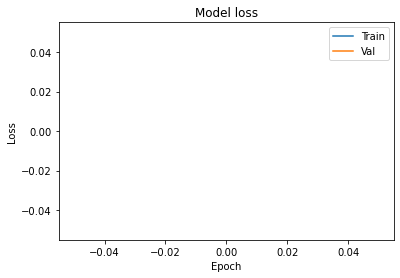

In [54]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

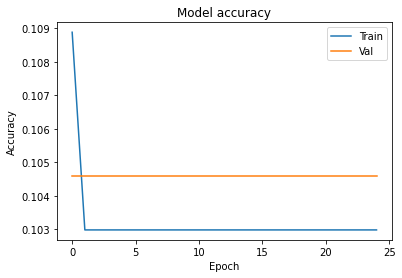

In [55]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [62]:
model_2 = Sequential([Dense(1000, activation='relu', input_shape=(11,)), Dense(1000, activation='relu'),
                      Dense(1000, activation='relu'), Dense(1000, activation='relu'),    
                      Dense(1, activation='sigmoid'),])

In [63]:
model_2.compile(optimizer='adam',              
                loss='binary_crossentropy',              
                metrics=['accuracy'])

In [64]:
hist_2 = model_2.fit(X_train, Y_train,          
                     batch_size=32, epochs=25,          
                     validation_data=(X_val, Y_val))

Epoch 1/25
8201/8201 [==============================] - 226s 27ms/step - loss: -9572664740823536.0000 - accuracy: 0.5274 - val_loss: -224054803016187904.0000 - val_accuracy: 0.5270
Epoch 2/25
8201/8201 [==============================] - 224s 27ms/step - loss: -627595609818328704.0000 - accuracy: 0.5274 - val_loss: -3235560904602943488.0000 - val_accuracy: 0.5270
Epoch 3/25
8201/8201 [==============================] - 224s 27ms/step - loss: -5501801330097037312.0000 - accuracy: 0.5280 - val_loss: -16469947511293870080.0000 - val_accuracy: 0.5270
Epoch 4/25
8201/8201 [==============================] - 223s 27ms/step - loss: -23686421108824608768.0000 - accuracy: 0.5287 - val_loss: -53969026872082694144.0000 - val_accuracy: 0.5270
Epoch 5/25
8201/8201 [==============================] - 225s 27ms/step - loss: -71387675768887582720.0000 - accuracy: 0.5275 - val_loss: -138405995938861547520.0000 - val_accuracy: 0.5270
Epoch 6/25
8201/8201 [==============================] - 242s 29ms/step - l

In [ ]:
model_2.evaluate(X_test, Y_test)[1]

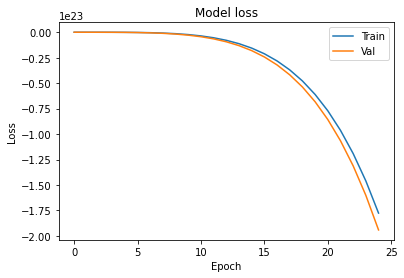

In [65]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

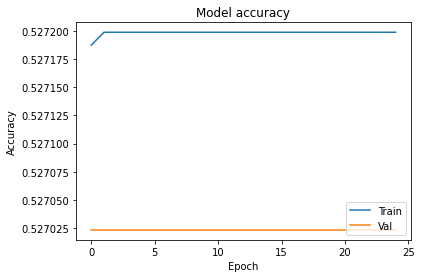

In [67]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()